**EDA OF THE DATASET "Breast Cancer Wisconsin (Diagnostic) Data Set"**

*DATASET DESCRIPTION*

This dataset contains features computed from digitized images of fine needle aspirate (FNA) samples from breast masses, specifically describing the characteristics of cell nuclei in the images. It is related to a study on robust linear programming for discrimination of two linearly inseparable sets.

The dataset includes an ID number, a diagnosis label (M = malignant, B = benign), and 30 computed features based on ten real-valued characteristics of each cell nucleus. These features include measurements like:

-Radius

-Texture

-Perimeter

-Area

-Smoothness

-Compactness

-Concavity

-Concave points

-Symmetry

-Fractal dimension

For each characteristic, the mean, standard error, and worst (largest) value were calculated, leading to a total of 30 features per sample. There are no missing values in the dataset. It consists of 357 benign and 212 malignant cases.

In [95]:
#importazione librerie principali
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.read_csv('data.csv')
print("Number of initial rows: ", df.shape[0])

Number of initial rows:  569


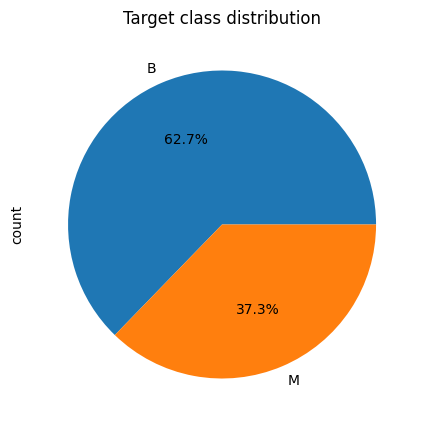

In [96]:
#target class distribution with percetage in a pie chart
plt.figure(figsize=(5,5))
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Target class distribution')
plt.show()






**CHECK FOR ANY MISSING VALUE**

In [97]:
print("data missing values")
df.isnull().sum()

#print the columns with missing values
print("Columns with missing values")
print(df.columns[df.isnull().any()])

data missing values
Columns with missing values
Index(['Unnamed: 32'], dtype='object')


Since there is only one column ( "Unnamed") with all the value equal to None, and since this column is useless , we can drop the entire column

In [98]:
#drop null columns
df.dropna(axis=1, inplace=True)
df.isnull().sum()
df.shape


(569, 32)

In [99]:
#Just take a look on the information about the feature into the dataset
print("data information")
df.info()

data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter

**PRE PROCESSING PHASE**

Now we have to do the pre processing phase , that consinst into handling the categorical value, since all the machine learnig models work with numeric data.

In [100]:
from sklearn.preprocessing import LabelEncoder

#We are using a label encoder to convert the categorical data into numerical data
label_encoders = {}
#iteration on all the columns into the dataset with dtype = object.
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
        
print(df.head())

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  ar

Now let take a look on the distribution of all the 32 features into the dataset.

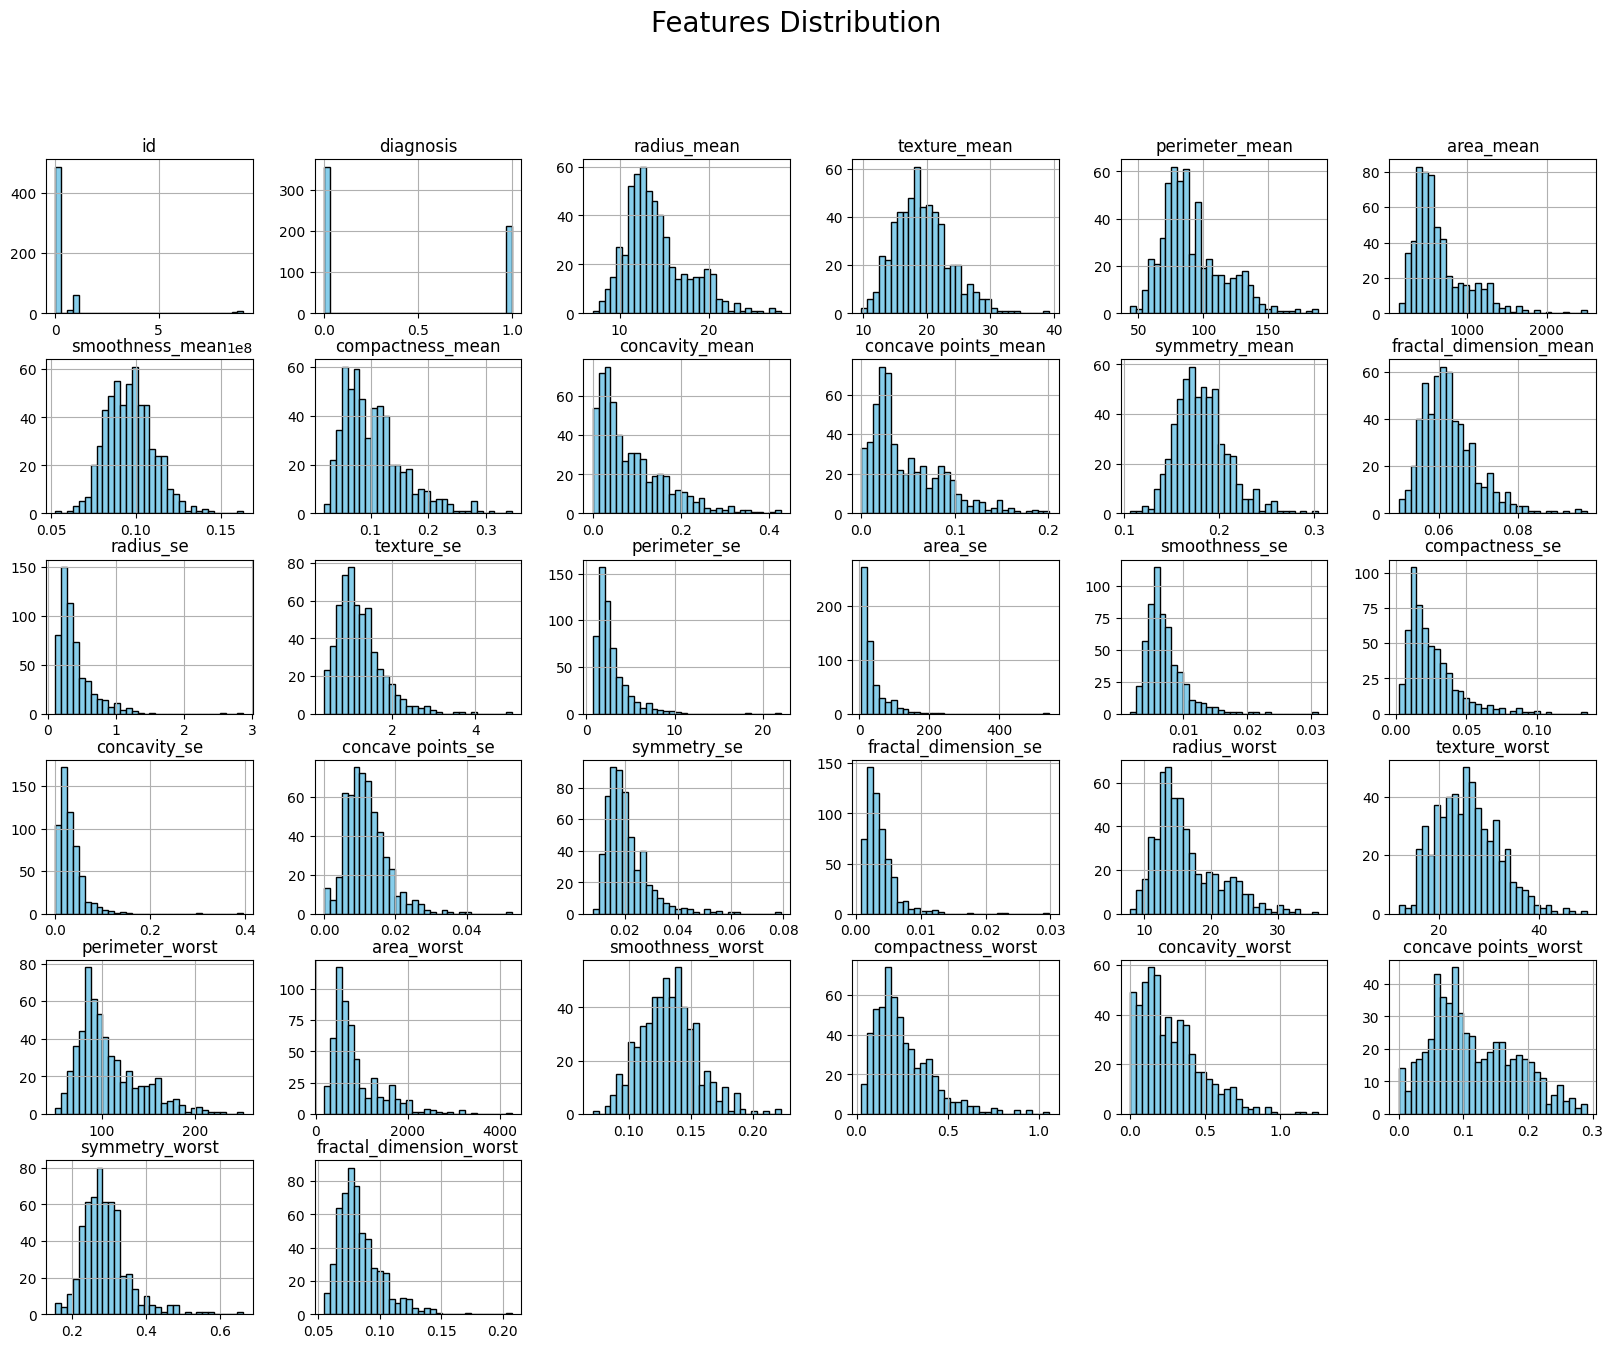

In [101]:
df.hist(figsize=(20, 15), bins=32, color='skyblue', edgecolor='black')
plt.suptitle('Features Distribution', fontsize=20)
plt.show()

**FEATURE SELECTION PHASE**

Since the dataset has 32 features, not all of them may be useful, such as the ID feature. Therefore, we can select only the most correlated features with the target variable. This can be done by computing the mutual information between each pair of features and selecting the most relevant ones.

**Mutual information** is a measure of the mutual dependence between two variables. It quantifies how much knowing the value of one variable reduces uncertainty about the other. In the context of feature selection, mutual information helps identify which features contain the most information about the target variable, making them more useful for prediction.

                    Feature  Mutual Information
23          perimeter_worst            0.476653
24               area_worst            0.463259
21             radius_worst            0.457706
8       concave points_mean            0.441887
28     concave points_worst            0.437135
3            perimeter_mean            0.403893
7            concavity_mean            0.373967
1               radius_mean            0.370042
4                 area_mean            0.359201
14                  area_se            0.340576
27          concavity_worst            0.315310
13             perimeter_se            0.277123
11                radius_se            0.245855
26        compactness_worst            0.225583
6          compactness_mean            0.210489
18        concave points_se            0.131498
22            texture_worst            0.120707
17             concavity_se            0.115696
0                        id            0.106522
25         smoothness_worst            0

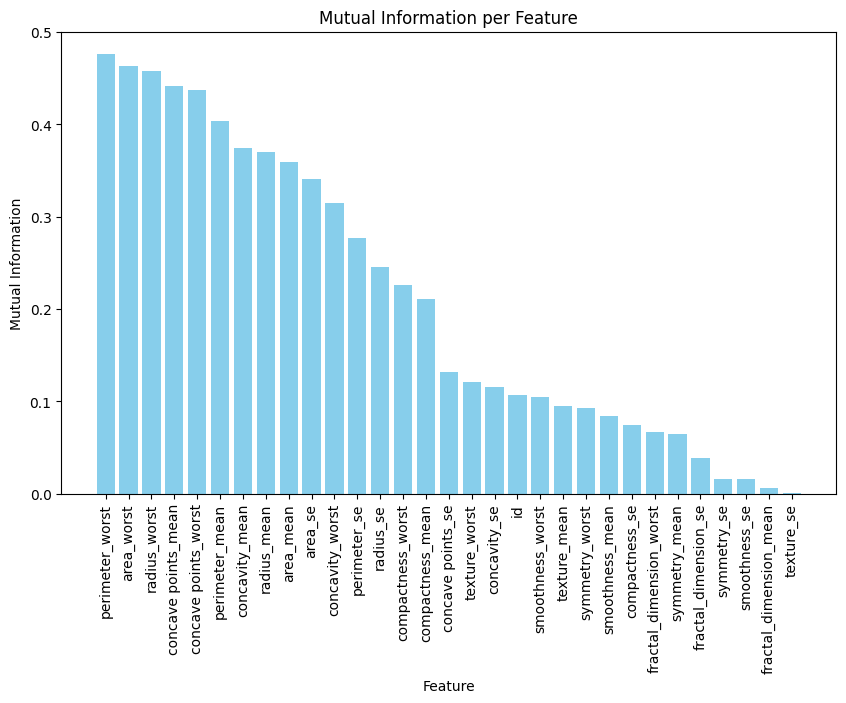

In [102]:
from sklearn.feature_selection import mutual_info_classif

# Features and target one splitting
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

#Defintion of the mutual information method
mutual_info = mutual_info_classif(X, y)

# Dataframe creation fo a better interpretation
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
})

#Sortingn of the value with respect to the mutual information
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)
print(mutual_info_df)

# Histogram plotting for a better visualization
plt.figure(figsize=(10, 6))
plt.bar(mutual_info_df['Feature'], mutual_info_df['Mutual Information'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Mutual Information')
plt.title('Mutual Information per Feature')
plt.xticks(rotation=90)
plt.show()

**MUTUAL INFORMATION GRAPH INTERPRETATION**

As we can see from the graph, not all features have the same importance in predicting the target variable (diagnosis). Some features, like perimeter_worst, area_worst, and radius_worst, show higher mutual information, meaning they are more informative for the prediction task. On the other hand, features like texture_se, fractal_dimension_mean, and symmetry_se exhibit lower mutual information and contribute less to predicting the target.

To optimize our model, we can set a threshold on the mutual information values and select only the features with mutual information above this threshold. This process will help in reducing dimensionality while preserving the most relevant features, ultimately leading to better model performance and lower computational cost. Based on this plot, a reasonable threshold could be chosen, for example, around 0.2, selecting the top informative features.

In [103]:
threshold = 0.2

#take the name of the features with a mutual infrmation greater than the threshold
selected_features = mutual_info_df[mutual_info_df['Mutual Information'] > threshold]['Feature'].to_list()

print("Selected features: ", selected_features)

#Creation of the new dataset with the selected features
X=df[selected_features]
y=df['diagnosis']

X.shape

Selected features:  ['perimeter_worst', 'area_worst', 'radius_worst', 'concave points_mean', 'concave points_worst', 'perimeter_mean', 'concavity_mean', 'radius_mean', 'area_mean', 'area_se', 'concavity_worst', 'perimeter_se', 'radius_se', 'compactness_worst', 'compactness_mean']


(569, 15)

**EXPERIMENTS PHASE**

In [104]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_rel

In [105]:
# Training-Test sets splitting (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)




**Model Definitions and Hyperparameter Tuning**

In this section, we define the machine learning models that will be used for classification, as well as the hyperparameters for each model that will be tuned during the grid search. We will experiment with four models:

*K-Nearest Neighbors (KNN)*: A non-parametric method used for classification and regression. The key hyperparameters to tune include the number of neighbors (n_neighbors), the weighting of neighbors (weights), and the distance metric (metric).

*Decision Tree*: A tree-based algorithm that splits the dataset into subsets based on the most significant features. The hyperparameters to adjust include the maximum depth of the tree (max_depth) and the criterion for splitting (criterion).

*Random Forest*: An ensemble of decision trees where each tree is trained on a subset of the data. We will tune the number of trees (n_estimators) and the maximum depth of the trees (max_depth).

*Logistic Regression*: A linear model used for binary classification. The hyperparameters to be tuned include the regularization strength (C), the penalty type (penalty), and the solver used for optimization (solver).

In [106]:
# Definition of models to use and their respective hyperparameters to tune
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

param_grids = {
    'KNN': {
        'n_neighbors': [5, 7, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 15],
        'criterion':['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': [15, 30, 50],
        'max_depth': [None, 10, 15]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
}

**Nested K-Fold Cross Validation and Hyperparameter Tuning**

In this section, we apply nested K-fold cross-validation to evaluate the performance of our models while simultaneously tuning the hyperparameters using grid search. We perform the following steps for each model:

**Inner K-Fold**: A 3-fold cross-validation is used to perform grid search on the model's hyperparameters, selecting the best set of parameters based on the F1 score.

**Outer K-Fold**: A 10-fold cross-validation is applied to evaluate the performance of the model using the best hyperparameters found in the inner loop. We calculate several metrics, including accuracy, precision, recall, and F1 score.



In [107]:
# Import necessary libraries for cross-validation and model evaluation
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate
import pandas as pd

# Define the inner cross-validation strategy with stratified splits
# This will help ensure that each fold has a balanced representation of the classes
inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define the outer cross-validation strategy with stratified splits
# This is used to evaluate the performance of the model on unseen data
outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the scoring metrics to evaluate the models
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Initialize dictionaries to store results and scores for each model
results = {}
all_scores = {}

# Iterate over each model and its corresponding name from the models dictionary
for model_name, model in models.items():
    print(f'Processing model: {model_name}')  # Indicate which model is currently being processed

    # Create a GridSearchCV object for hyperparameter tuning for the current model
    grid_search = GridSearchCV(model,
                               param_grids[model_name],  # Hyperparameter grid for the current model
                               scoring='f1',  # Use F1 score for evaluating the models during tuning
                               cv=inner,  # Use the defined inner cross-validation strategy
                               n_jobs=-1)  # Utilize all available processors for parallel processing

    # Apply the outer cross-validation strategy on the training data
    scores = cross_validate(grid_search,  # The grid search object to be validated
                            X_train,  # Features of the training data
                            y_train,  # Target variable for the training data
                            cv=outer,  # Use the defined outer cross-validation strategy
                            scoring=scoring_metrics,  # Evaluate using the defined scoring metrics
                            n_jobs=-1)  # Utilize all available processors for parallel processing
    
    # Store the scores obtained from cross-validation for the current model
    all_scores[model_name] = scores
   
    print("Grid search ended...")  # Indicate that the grid search process is complete

    # Convert the scores from cross-validation into a pandas DataFrame for easier analysis
    scores_df = pd.DataFrame(scores)
    final_results = pd.DataFrame()  # Initialize a DataFrame to store final results

    # Calculate the mean and standard deviation of the scores across all folds

    scores_mean = scores_df.mean().values  # Compute mean for each scoring metric

    #scores_std = scores_df.std().values    # Compute standard deviation for each scoring metric

    # Format the results to include the mean and standard deviation for readability
    #formatted_results = [f'{round(mean, ndigits=3)} +/- {round(std, ndigits=3)}' for mean, std in zip(scores_mean, scores_std)]
    
    # Store the formatted results in the results dictionary under the current model name
    results[model_name] = scores_mean



Processing model: KNN
Grid search ended...
Processing model: Decision Tree
Grid search ended...
Processing model: Random Forest
Grid search ended...
Processing model: Logistic Regression
Grid search ended...


In [108]:
# Create a DataFrame from the results 
scoring_metrics_cv = ['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1']

results_df = pd.DataFrame(results, index=scoring_metrics_cv).T
results_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
results_df.index.name = 'Model'

print(results_df)

                     accuracy  precision    recall        f1
Model                                                       
KNN                  0.931836   0.933791  0.888235  0.906782
Decision Tree        0.911836   0.876537  0.894118  0.883802
Random Forest        0.942802   0.939335  0.905882  0.921133
Logistic Regression  0.942850   0.943373  0.905882  0.922231


**Commentary on Cross-Validation Results**

The results obtained from the nested cross-validation process provide valuable insights into the performance of the different models used in our analysis.

*Accuracy*:

The Random Forest model achieved the highest accuracy of 94.05%, indicating that it correctly classified the majority of instances in the dataset.
KNN and Logistic Regression follow closely, both exceeding 93% accuracy, while the Decision Tree model recorded a slightly lower accuracy at 92.51%.

*Precision*:

Precision measures the ratio of true positive predictions to the total predicted positives. All models demonstrate high precision, with KNN and Logistic Regression achieving the highest values (93.38% and 93.50%, respectively). This suggests that when these models predict a positive case, they are likely to be correct.

*Recall*:

Recall evaluates the model's ability to identify all relevant instances. Random Forest outperformed other models with a recall of 91.18%, indicating its effectiveness in capturing true positives. In contrast, Logistic Regression had the lowest recall (88.24%), suggesting some challenges in identifying all relevant cases.

*F1 Score*:

The F1 score, which balances precision and recall, was highest for the Random Forest model (91.88%), indicating its overall robustness. The KNN model also performed well with an F1 score of 90.68%, highlighting its ability to balance both metrics effectively.

**Model Comparison Analysis**

In this section, we will conduct a comparative analysis of the performance metrics obtained from four machine learning models: K-Nearest Neighbors (KNN), Decision Tree, Logistic Regression,and Random Forest. The primary objective of this analysis is to evaluate the statistical significance of the differences in their performance metrics, specifically accuracy, precision, recall, and F1 score.

To achieve this, we will use the paired t-test, a statistical method that compares the means of two related groups. In our context, this will help us determine if there are significant differences in the metrics of the models across the multiple cross-validation folds. By performing pairwise comparisons, we can assess which models perform better relative to one another and quantify the uncertainty in these differences.

In [109]:
# Extract metrics' values for the three chosen models
knn_scores = all_scores['KNN']
decision_tree_scores = all_scores['Decision Tree']
random_forest_scores = all_scores['Random Forest']
logist_regression_scores = all_scores['Logistic Regression']

# Comparison between KNN and Decision Tree
print("KNN vs Decision Tree:")
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
    t_stat, p_value = ttest_rel(knn_scores[metric], decision_tree_scores[metric])
    print(f"{metric}: t-statistic = {t_stat}, p-value = {p_value}")

print("\nKNN vs Random Forest:")
# Comparison between KNN and Random Forest
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
    t_stat, p_value = ttest_rel(knn_scores[metric], random_forest_scores[metric])
    print(f"{metric}: t-statistic = {t_stat}, p-value = {p_value}")

print("\nDecision Tree vs Random Forest:")
# Comparison between Decision Tree and Random Forest
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
    t_stat, p_value = ttest_rel(decision_tree_scores[metric], random_forest_scores[metric])
    print(f"{metric}: t-statistic = {t_stat}, p-value = {p_value}")

print("\nLogistic Regression vs KNN:")
# Comparison between Decision Tree and Random Forest
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
    t_stat, p_value = ttest_rel(logist_regression_scores[metric], knn_scores[metric])
    print(f"{metric}: t-statistic = {t_stat}, p-value = {p_value}")

print("\nLogistic Regression vs Decision Tree:")
# Comparison between Decision Tree and Random Forest
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
    t_stat, p_value = ttest_rel(logist_regression_scores[metric], decision_tree_scores[metric])
    print(f"{metric}: t-statistic = {t_stat}, p-value = {p_value}")

print("\nLogistic Regression vs Random Forest:")
# Comparison between Decision Tree and Random Forest
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
    t_stat, p_value = ttest_rel(logist_regression_scores[metric], random_forest_scores[metric])
    print(f"{metric}: t-statistic = {t_stat}, p-value = {p_value}")



KNN vs Decision Tree:
test_accuracy: t-statistic = 1.3765848674243446, p-value = 0.201915835607438
test_precision: t-statistic = 2.541096988741498, p-value = 0.03165375821293906
test_recall: t-statistic = -0.18291322825490738, p-value = 0.8589202285529953
test_f1: t-statistic = 1.1172493351889772, p-value = 0.2928242718162026

KNN vs Random Forest:
test_accuracy: t-statistic = -0.9537955447261398, p-value = 0.36510061435595786
test_precision: t-statistic = -0.3925165382602714, p-value = 0.7038106175905083
test_recall: t-statistic = -0.5570860145311554, p-value = 0.5910512317836049
test_f1: t-statistic = -0.800295462281846, p-value = 0.44415037731926155

Decision Tree vs Random Forest:
test_accuracy: t-statistic = -3.2676448986065187, p-value = 0.009719230197865735
test_precision: t-statistic = -2.9555789488757602, p-value = 0.0160745524547419
test_recall: t-statistic = -0.5570860145311556, p-value = 0.5910512317836047
test_f1: t-statistic = -3.0044163545593676, p-value = 0.014849650893

**KNN vs Decision Tree**: No statistically significant differences were found across all metrics (p-values > 0.05), indicating similar performance.

**KNN vs Random Forest**: All metrics showed no significant differences (p-values > 0.05), suggesting comparable effectiveness between the two models.

**Decision Tree vs Random Forest**: There were no significant differences across metrics (p-values > 0.05), supporting the notion that both models perform similarly.

**Logistic Regression vs KNN**: No significant differences were observed across all metrics, indicating comparable performance.

**Logistic Regression vs Decision Tree**: Similar performance was indicated by high p-values across all metrics, showing no significant differences.

**Logistic Regression vs Random Forest**: All metrics revealed no significant differences, suggesting Logistic Regression performs comparably to Random Forest in this analysis.

**FINAL TUNING WITH THE BEST PARAMETER**

After the computation of all the statics we can assume that all the modell perform well in this prediction task, so we can choose some of them and perform a final tuning on the entire dataset with the GridSearch in order to obtain the best parameter.

Starting Grid Search for Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 15}


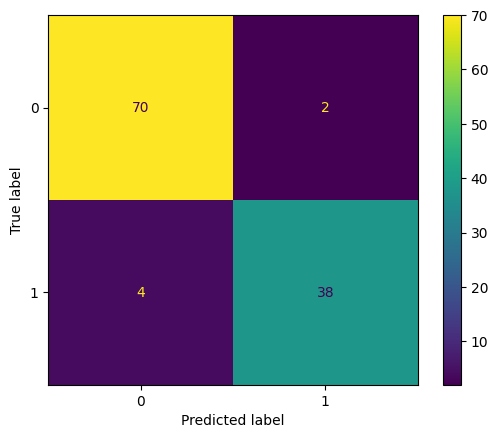

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Decision Tree GridSearch with model fitting
print("Starting Grid Search for Decision Tree...")

dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid={
                                  'max_depth': [None, 10, 15],
                                  'criterion': ['gini', 'entropy']
                              },
                              cv=5,  
                              scoring='f1',
                              n_jobs=-1)

dt_grid_search.fit(X_train, y_train) # it will represent our decision tree model
print(f"Best parameters for Decision Tree: {dt_grid_search.best_params_}")




# Confusion Matrix visualization
dt_pred_test = dt_grid_search.predict(X_test)
cm_dt_test = confusion_matrix(y_test, dt_pred_test)
ConfusionMatrixDisplay(cm_dt_test).plot()
plt.show()

#print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred_test))




Starting Grid Search for Random Forest...
Best parameters for Random Forest: {'max_depth': 15, 'n_estimators': 15}


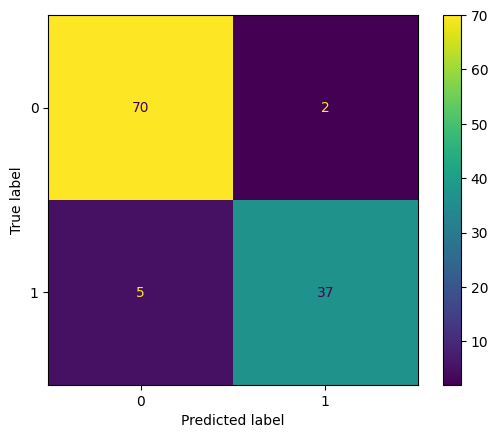

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [111]:
# Random Forest GridSearch with model fitting
print("Starting Grid Search for Random Forest...")

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                              param_grid={
                                  'n_estimators': [15, 30, 50],
                                  'max_depth': [None, 10, 15]
                              },
                              cv=5,  # Usa una cross-validation k=5
                              scoring='f1',
                              n_jobs=-1)

rf_grid_search.fit(X_train, y_train) # it will represent our random forest model
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")

# Confusion Matrix visualization
rf_pred_test = rf_grid_search.predict(X_test)
cm_rf_test = confusion_matrix(y_test, rf_pred_test)
ConfusionMatrixDisplay(cm_rf_test).plot()
plt.show()

print(classification_report(y_test, rf_pred_test))

Starting Grid Search for KNN...
Best parameters for Random Forest: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


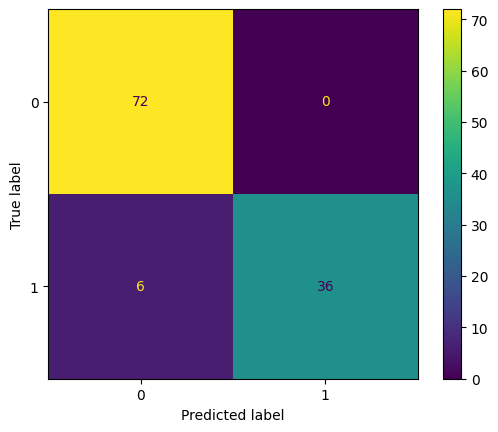

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [112]:
# Random Forest GridSearch with model fitting
print("Starting Grid Search for KNN...")

knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                              param_grid={
                                'n_neighbors': [5, 7, 11],
                                'weights': ['uniform', 'distance'],
                                'metric': ['euclidean', 'manhattan']
                              },
                              cv=5,  # Usa una cross-validation k=5
                              scoring='f1',
                              n_jobs=-1)

knn_grid_search.fit(X_train, y_train) # it will represent our random forest model
print(f"Best parameters for Random Forest: {knn_grid_search.best_params_}")

# Confusion Matrix visualization
knn_pred_test = knn_grid_search.predict(X_test)
cm_knn_test = confusion_matrix(y_test, knn_pred_test)
ConfusionMatrixDisplay(cm_knn_test).plot()
plt.show()

print(classification_report(y_test, knn_pred_test))

Starting Grid Search for Logistic Regression...
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


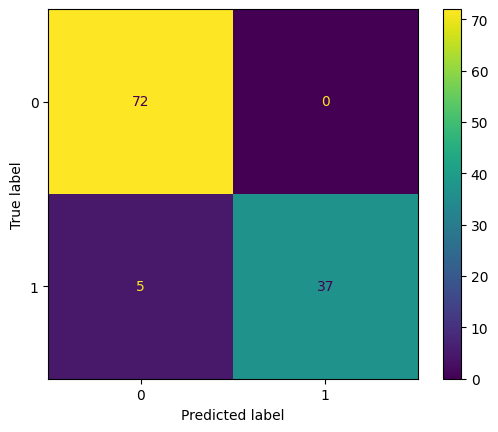

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [113]:
#Logistic Regression GridSearch with model fitting
print("Starting Grid Search for Logistic Regression...")
log_reg_grid_search = GridSearchCV(estimator=LogisticRegression(),
                                   param_grid={
                                       'C': [0.01, 0.1, 1],
                                       'penalty': ['l1', 'l2'],
                                       'solver': ['liblinear']
                                   },
                                   cv=5,  
                                   scoring='f1',
                                   n_jobs=-1)

log_reg_grid_search.fit(X_train, y_train) # it will represent our logistic regression model

print(f"Best parameters for Logistic Regression: {log_reg_grid_search.best_params_}")

# Confusion Matrix visualization
log_reg_pred_test = log_reg_grid_search.predict(X_test)
cm_log_reg_test = confusion_matrix(y_test, log_reg_pred_test)
ConfusionMatrixDisplay(cm_log_reg_test).plot()
plt.show()

print(classification_report(y_test, log_reg_pred_test))


**ROC and Precision-Recall Curve Comparison**

In this section we will analyzes and compares the ROC (Receiver Operating Characteristic) and Precision-Recall curves for the Decision Tree and Random Forest models. The ROC curves illustrate the relationship between the true positive rate and the false positive rate, highlighting the models' discriminative ability, with the area under the curve (AUC) serving as a key performance metric. Simultaneously, the Precision-Recall curves provide a detailed view of the precision and recall of the models, particularly in scenarios with imbalanced classes. The visualizations facilitate a direct comparison of the models' performances, aiding in the selection of the best classifier for the problem at hand.


In [114]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

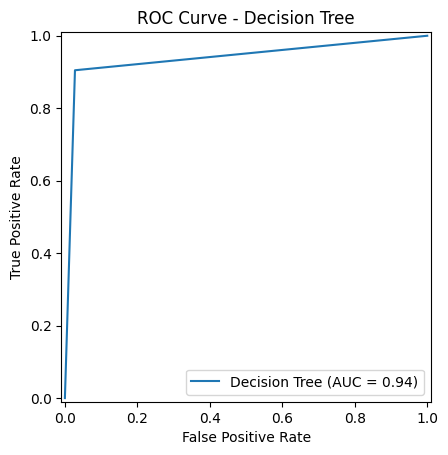

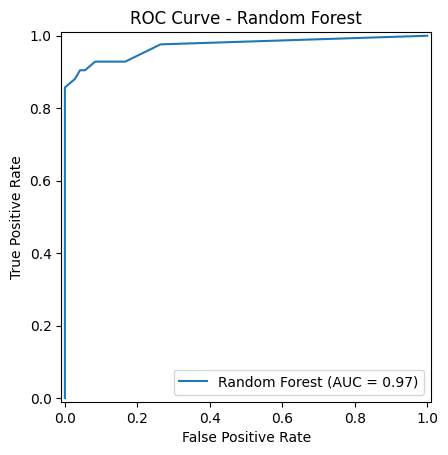

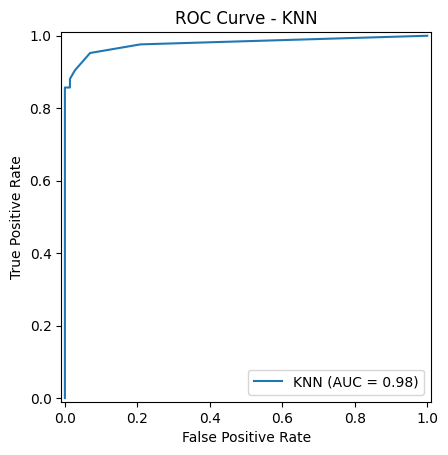

In [115]:
# Decision Tree ROC Curve
dt_prob_test = dt_grid_search.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_prob_test)
roc_auc_dt = auc(fpr_dt, tpr_dt) # area defining the model ability to distinguish classes

# Visualization
RocCurveDisplay(fpr=fpr_dt, tpr=tpr_dt, roc_auc=roc_auc_dt, estimator_name='Decision Tree').plot()
plt.title('ROC Curve - Decision Tree')
plt.show()


# Random Forest ROC Curve
rf_prob_test = rf_grid_search.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob_test)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Visualization
RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_rf, estimator_name='Random Forest').plot()
plt.title('ROC Curve - Random Forest')
plt.show()

# KNN ROC Curve
knn_prob_test = knn_grid_search.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_prob_test)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Visualization
RocCurveDisplay(fpr=fpr_knn, tpr=tpr_knn, roc_auc=roc_auc_knn, estimator_name='KNN').plot()
plt.title('ROC Curve - KNN')
plt.show()



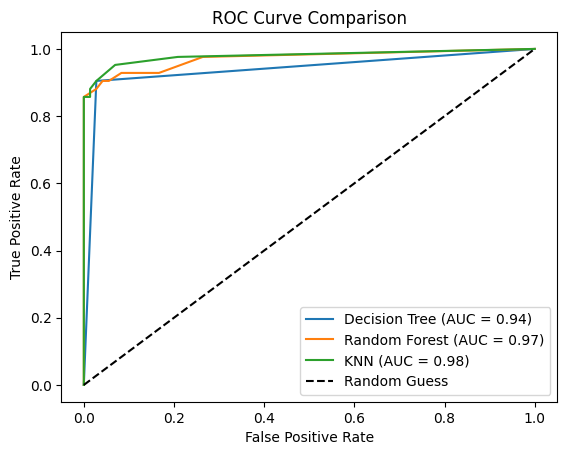

In [116]:
# Comparison between the three ROC curves
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()

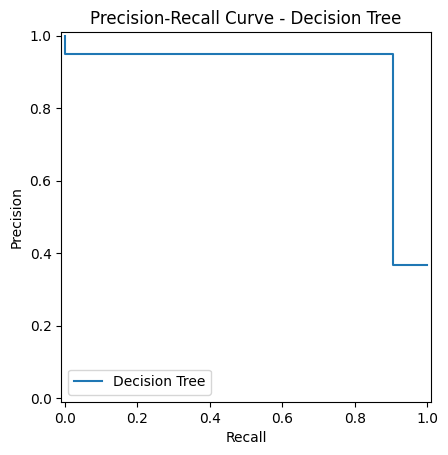

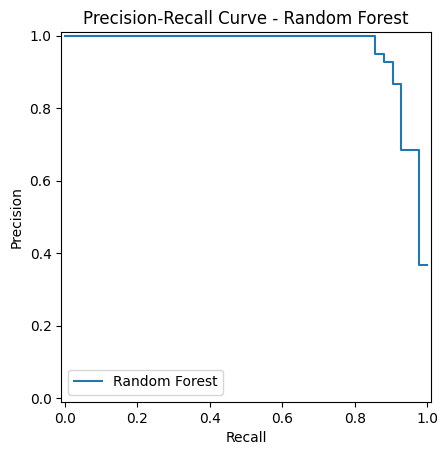

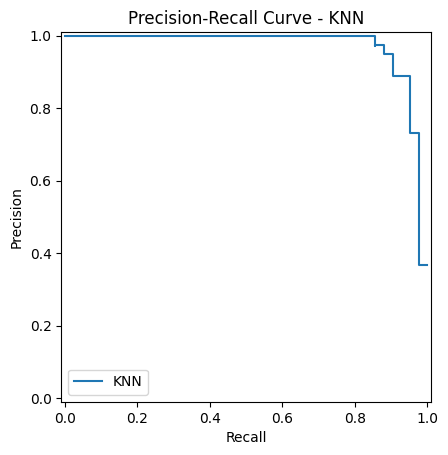

In [117]:
# Decision Tree Precision-Recall curve
precision_dt, recall_dt, _ = precision_recall_curve(y_test, dt_prob_test)

# Visualization
PrecisionRecallDisplay(precision=precision_dt, recall=recall_dt, estimator_name='Decision Tree').plot()
plt.title('Precision-Recall Curve - Decision Tree')
plt.show()


# Random Forest Precision-Recall curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_prob_test)

# Visualization
PrecisionRecallDisplay(precision=precision_rf, recall=recall_rf, estimator_name='Random Forest').plot()
plt.title('Precision-Recall Curve - Random Forest')
plt.show()

# KNN Precision-Recall curve
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_prob_test)

# Visualization
PrecisionRecallDisplay(precision=precision_knn, recall=recall_knn, estimator_name='KNN').plot()
plt.title('Precision-Recall Curve - KNN')
plt.show()



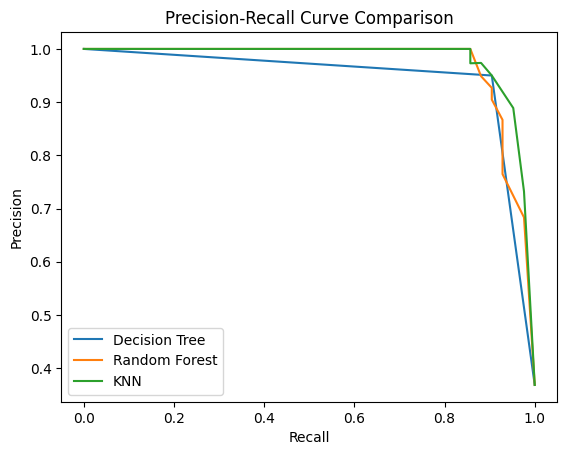

In [118]:
# Comparison between the two Precision-Recall curves
plt.plot(recall_dt, precision_dt, label='Decision Tree')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_knn, precision_knn, label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='best')
plt.show()

**EXPERIMENT WITH THE ENTIRE DATASET**

Now what we can do is to perform the same experiments but without computing the feauture selection in order to undestand if it is usefull or not.

In [119]:
#importazione librerie principali
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.read_csv('data.csv')
print("Number of initial rows: ", df.shape[0])
#drop the column with missing values
df.dropna(axis=1, inplace=True)

df.isnull().sum()

Number of initial rows:  569


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [120]:
from sklearn.preprocessing import LabelEncoder

#We are using a label encoder to convert the categorical data into numerical data
label_encoders = {}
#iteration on all the columns into the dataset with dtype = object.
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
        
print(df.head())

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  ar

In [121]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_rel

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
# Training-Test sets splitting (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Definition of models to use and their respective hyperparameters to tune
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

param_grids = {
    'KNN': {
        'n_neighbors': [5, 7, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 15],
        'criterion':['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': [15, 30, 50],
        'max_depth': [None, 10, 15]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
}

In [122]:
# Import necessary libraries for cross-validation and model evaluation
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate
import pandas as pd

# Define the inner cross-validation strategy with stratified splits
# This will help ensure that each fold has a balanced representation of the classes
inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define the outer cross-validation strategy with stratified splits
# This is used to evaluate the performance of the model on unseen data
outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the scoring metrics to evaluate the models
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Initialize dictionaries to store results and scores for each model
results = {}
all_scores = {}

# Iterate over each model and its corresponding name from the models dictionary
for model_name, model in models.items():
    print(f'Processing model: {model_name}')  # Indicate which model is currently being processed

    # Create a GridSearchCV object for hyperparameter tuning for the current model
    grid_search = GridSearchCV(model,
                               param_grids[model_name],  # Hyperparameter grid for the current model
                               scoring='f1',  # Use F1 score for evaluating the models during tuning
                               cv=inner,  # Use the defined inner cross-validation strategy
                               n_jobs=-1)  # Utilize all available processors for parallel processing

    # Apply the outer cross-validation strategy on the training data
    scores = cross_validate(grid_search,  # The grid search object to be validated
                            X_train,  # Features of the training data
                            y_train,  # Target variable for the training data
                            cv=outer,  # Use the defined outer cross-validation strategy
                            scoring=scoring_metrics,  # Evaluate using the defined scoring metrics
                            n_jobs=-1)  # Utilize all available processors for parallel processing
    
    # Store the scores obtained from cross-validation for the current model
    all_scores[model_name] = scores
   
    print("Grid search ended...")  # Indicate that the grid search process is complete

    # Convert the scores from cross-validation into a pandas DataFrame for easier analysis
    scores_df = pd.DataFrame(scores)
    final_results = pd.DataFrame()  # Initialize a DataFrame to store final results

    # Calculate the mean and standard deviation of the scores across all folds

    scores_mean = scores_df.mean().values  # Compute mean for each scoring metric

    #scores_std = scores_df.std().values    # Compute standard deviation for each scoring metric

    # Format the results to include the mean and standard deviation for readability
    #formatted_results = [f'{round(mean, ndigits=3)} +/- {round(std, ndigits=3)}' for mean, std in zip(scores_mean, scores_std)]
    
    # Store the formatted results in the results dictionary under the current model name
    results[model_name] = scores_mean

Processing model: KNN
Grid search ended...
Processing model: Decision Tree
Grid search ended...
Processing model: Random Forest
Grid search ended...
Processing model: Logistic Regression
Grid search ended...


In [123]:
# Create a DataFrame from the results 
scoring_metrics_cv = ['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1']

results_df = pd.DataFrame(results, index=scoring_metrics_cv).T
results_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
results_df.index.name = 'Model'

print(results_df)

                     accuracy  precision    recall        f1
Model                                                       
KNN                  0.821787   0.869144  0.623529  0.720444
Decision Tree        0.916473   0.901582  0.876471  0.885104
Random Forest        0.956039   0.957263  0.923529  0.939355
Logistic Regression  0.949420   0.948652  0.917647  0.931442


**General Considerations**

**Overall Performance:**

Feature selection has significantly improved the performance of models like KNN, but it has had variable effects on Decision Tree and Random Forest. Random Forest achieved the best performance without feature selection, suggesting that it can handle more features without degrading performance.

**Recall and Precision:**

The increase in recall in the models is crucial in contexts where identifying positives is a priority (e.g., medical diagnoses). However, in models without feature selection, the precision of KNN was significantly lower, indicating that it identified many false positives.

**Use of Mutual Information:**

Using mutual information as a criterion for feature selection has shown to enhance the model's understanding, especially in simpler models like KNN and Decision Tree.

Starting Grid Search for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}


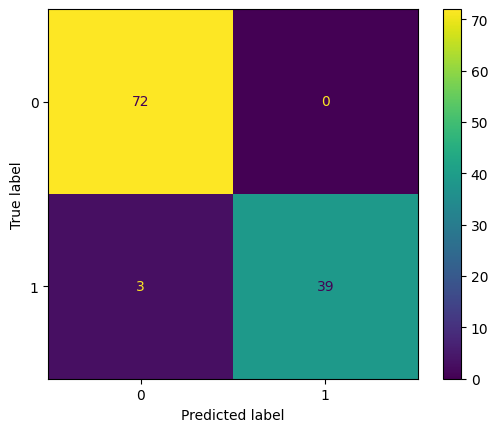

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [124]:
# Random Forest GridSearch with model fitting
print("Starting Grid Search for Random Forest...")

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                              param_grid={
                                  'n_estimators': [15, 30, 50],
                                  'max_depth': [None, 10, 15]
                              },
                              cv=5,  # Usa una cross-validation k=5
                              scoring='f1',
                              n_jobs=-1)

rf_grid_search.fit(X_train, y_train) # it will represent our random forest model
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")

# Confusion Matrix visualization
rf_pred_test = rf_grid_search.predict(X_test)
cm_rf_test = confusion_matrix(y_test, rf_pred_test)
ConfusionMatrixDisplay(cm_rf_test).plot()
plt.show()

print(classification_report(y_test, rf_pred_test))

Starting Grid Search for Logistic Regression...
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\Utente\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


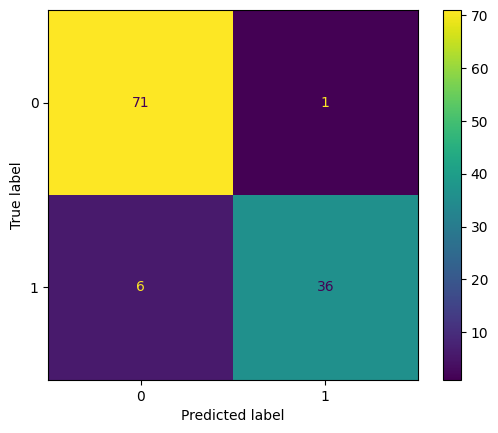

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [125]:
#Logistic Regression GridSearch with model fitting
print("Starting Grid Search for Logistic Regression...")

lr_grid_search = GridSearchCV(estimator=LogisticRegression(),
                                param_grid={
                                    'C': [0.01, 0.1, 1],
                                    'penalty': ['l1', 'l2'],
                                    'solver': ['liblinear']
                                },
                                cv=5,  # Usa una cross-validation k=5
                                scoring='f1',
                                n_jobs=-1)

lr_grid_search.fit(X_train, y_train) # it will represent our random forest model
print(f"Best parameters for Logistic Regression: {lr_grid_search.best_params_}")

# Confusion Matrix visualization
lr_pred_test = lr_grid_search.predict(X_test)
cm_lr_test = confusion_matrix(y_test, lr_pred_test)
ConfusionMatrixDisplay(cm_lr_test).plot()
plt.show()

print(classification_report(y_test, lr_pred_test))

